# Disc 13 Demo: Loan Prediction
The lending industry plays a crucial role in our economy by providing financial assistance to individuals and businesses. However, ensuring that loans are granted to the right applicants is a complex task that involves analyzing a multitude of factors such as credit score, income, employment history, and debt-to-income ratio.

In this demo, we will explore how various classification models can be used to predict whether a loan applicant is likely to default or not. We will start by understanding the dataset, performing exploratory data analysis, and then preprocessing the data. Next, we will build and evaluate various classification models such as logistic regression, decision trees, and random forests.

Through this demo, we will learn how to use Python libraries such as Pandas, NumPy, Matplotlib, and Scikit-learn to preprocess data, build models, and evaluate their performance. 

-- Written by ChatGPT (edited)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

## Import Datasets

In [2]:
train_loan = pd.read_csv('data/train_loan.csv')
train_loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
test_loan = pd.read_csv('data/test_loan.csv')
test_loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [4]:
train_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleaning

In [5]:
train_loan[train_loan['Dependents'].isnull()][['Dependents', 'Married']]

,Dependents,Married
102,NaN,Yes
104,NaN,NaN
120,NaN,Yes
226,NaN,Yes
228,NaN,NaN
293,NaN,No
301,NaN,Yes
332,NaN,No
335,NaN,Yes
346,NaN,Yes


### Imputing missing values

In [6]:
# imputing missing values
train_loan['Gender'].fillna('Male', inplace = True)
train_loan['Married'].fillna('Yes', inplace = True)
train_loan['Self_Employed'].fillna('No', inplace = True)
train_loan['Credit_History'].fillna('1.0', inplace = True)
train_loan['LoanAmount'].fillna((train_loan['LoanAmount'].mean()), inplace = True)
train_loan['Loan_Amount_Term'].fillna('84', inplace = True)
train_loan['Dependents'].fillna(0, inplace = True)

---

In [7]:
train_loan['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
0      15
Name: Dependents, dtype: int64

### Data Type Conversion

In [8]:
train_loan['Dependents'].replace('3+',3,inplace = True)
train_loan['Dependents'].value_counts()

0    345
1    102
2    101
3     51
0     15
Name: Dependents, dtype: int64

In [9]:
# datatype conversion
train_loan['Dependents'] = train_loan['Dependents'].astype('int')
train_loan['Dependents'].dtype

dtype('int32')

## EDA

### Summary Statistics

In [10]:
train_loan.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,146.412162
std,1.009623,6109.041673,2926.248369,84.037468
min,0.000000,150.000000,0.000000,9.000000
25%,0.000000,2877.500000,0.000000,100.250000
50%,0.000000,3812.500000,1188.500000,129.000000
75%,1.000000,5795.000000,2297.250000,164.750000
max,3.000000,81000.000000,41667.000000,700.000000


### Frequency Plot

In [11]:
def plot_loan_status(variable):
    sns.countplot(x = train_loan[variable], hue = train_loan['Loan_Status'])

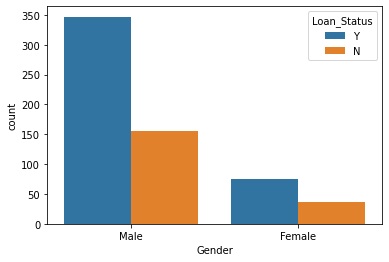

In [12]:
plot_loan_status("Gender")

In [13]:
lst_var = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
           'Credit_History', 'Property_Area', 'Loan_Amount_Term']
v = widgets.Dropdown(options=lst_var,
                     value='Gender', 
                     description='Variable', 
                     layout={'width': 'max-content'})

interact(plot_loan_status, variable=v);

interactive(children=(Dropdown(description='Variable', layout=Layout(width='max-content'), options=('Gender', …

### Pair Plot

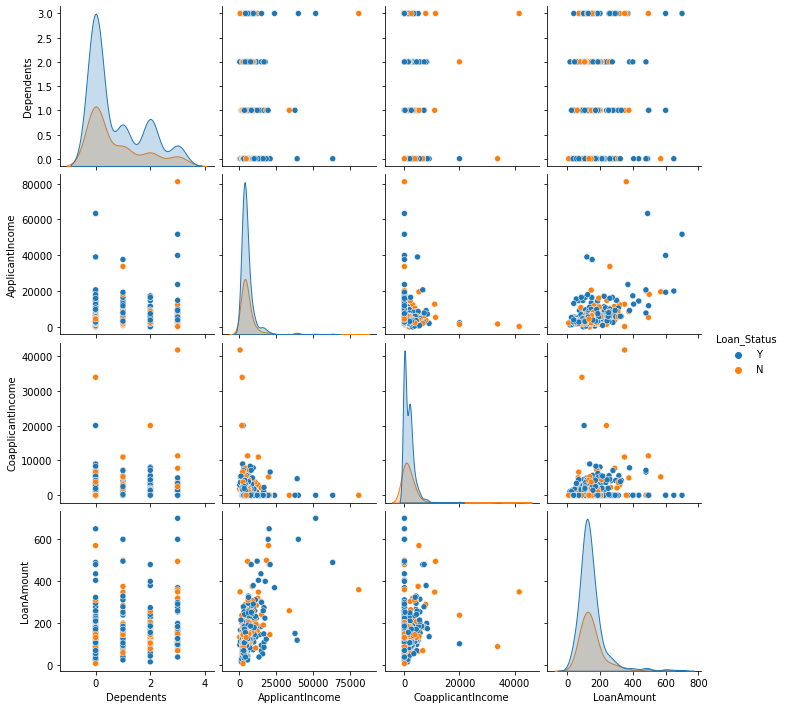

In [14]:
sns.pairplot(train_loan, hue = 'Loan_Status')

---
## Classification

### Preprocessing

In [15]:
train = train_loan.drop('Loan_ID', axis = 1)

In [16]:
obj_col = train.select_dtypes('object').columns
obj_col

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Converting Object to Numeric data type

In [17]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
train[obj_col] = train[obj_col].astype(str)
train[obj_col] = oe.fit_transform(train[obj_col])
train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,6.0,1.0,2.0,1.0
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,6.0,1.0,0.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,6.0,1.0,2.0,1.0


#### Standardization

In [18]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train.iloc[:,:-1] = ss.fit_transform(train.iloc[:,:-1])
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.196819,0.411733,1.223298,1.0
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.196819,0.411733,-1.318513,0.0
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.196819,0.411733,1.223298,1.0
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.196819,0.411733,1.223298,1.0
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.196819,0.411733,1.223298,1.0


#### Splitting the data

In [19]:
x = train.iloc[:,:-1]
y = train.iloc[:,-1]
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.196819,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.196819,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.196819,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.196819,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.196819,0.411733,1.223298


### Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state = 4, test_size = 0.25, stratify = y)

---

### Classification Setup

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
def fit_and_score(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    train_accuracy = model.score(xtrain,ytrain)
    test_accuracy = model.score(xtest, ytest)
    print(str(model)[:-2], 'Accuracy')
#     print('Accuracy: ', accuracy_score(ytest,ypred))
    print("Classification Report: \n", classification_report(ytest, ypred), '\nConfusion Matrix: \n', confusion_matrix(ytest, ypred))
    print(f'Training Accuracy: {train_accuracy}\nTesting Accuracy: {test_accuracy}')
    return model

<img src="img/confusion-matrix.png" alt="Confusion Matrix">
Confusion Matrix Illustration

---

### K-Nearest Neighbors (KNN)

<img src="img/KNN.png" alt="KNN">

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = fit_and_score(KNeighborsClassifier())

KNeighborsClassifier Accuracy
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.86      0.52      0.65        48
         1.0       0.82      0.96      0.88       106

    accuracy                           0.82       154
   macro avg       0.84      0.74      0.77       154
weighted avg       0.83      0.82      0.81       154
 
Confusion Matrix: 
 [[ 25  23]
 [  4 102]]
Training Accuracy: 0.8217391304347826
Testing Accuracy: 0.8246753246753247


### Support Vector Machine (SVM)

<img src="img/SVM.png" alt="SVM">

In [24]:
from sklearn.svm import SVC
svc = fit_and_score(SVC())

SVC Accuracy
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.44      0.61        48
         1.0       0.80      1.00      0.89       106

    accuracy                           0.82       154
   macro avg       0.90      0.72      0.75       154
weighted avg       0.86      0.82      0.80       154
 
Confusion Matrix: 
 [[ 21  27]
 [  0 106]]
Training Accuracy: 0.8108695652173913
Testing Accuracy: 0.8246753246753247


### Decision Tree

<img src="img/DT.png" alt="DT">

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt= fit_and_score(DecisionTreeClassifier())

DecisionTreeClassifier Accuracy
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.58      0.52      0.55        48
         1.0       0.79      0.83      0.81       106

    accuracy                           0.73       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.73      0.73      0.73       154
 
Confusion Matrix: 
 [[25 23]
 [18 88]]
Training Accuracy: 1.0
Testing Accuracy: 0.7337662337662337


### Random Forest

<img src="img/RF.png" alt="RF">

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = fit_and_score(RandomForestClassifier(n_estimators = 80, max_depth = 10, min_samples_leaf = 12))

RandomForestClassifier(max_depth=10, min_samples_leaf=12, n_estimators=8 Accuracy
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.48      0.65        48
         1.0       0.81      1.00      0.89       106

    accuracy                           0.84       154
   macro avg       0.90      0.74      0.77       154
weighted avg       0.87      0.84      0.82       154
 
Confusion Matrix: 
 [[ 23  25]
 [  0 106]]
Training Accuracy: 0.8
Testing Accuracy: 0.8376623376623377


### Gaussian Naive Bayes

<img src="img/GNB.png" alt="GNB">

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = fit_and_score(GaussianNB())

GaussianNB Accuracy
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.48      0.64        48
         1.0       0.81      0.99      0.89       106

    accuracy                           0.83       154
   macro avg       0.88      0.73      0.76       154
weighted avg       0.85      0.83      0.81       154
 
Confusion Matrix: 
 [[ 23  25]
 [  1 105]]
Training Accuracy: 0.8021739130434783
Testing Accuracy: 0.8311688311688312


---
### Model Evaluation

In [28]:
model_names = ["KNN", "SVM", "DT", "RF", "GNB"]
train_accuracies = [0.8217391304347826, 0.8108695652173913, 1.0, 0.8, 0.8021739130434783]
test_accuracies = [0.8246753246753247, 0.8246753246753247, 0.7532467532467533, 0.8376623376623377, 0.8311688311688312]
model_comparison = pd.DataFrame({
    "model": model_names, 
    "train": train_accuracies, 
    "test": test_accuracies
})
model_comparison

,model,train,test
0,KNN,0.821739,0.824675
1,SVM,0.810870,0.824675
2,DT,1.000000,0.753247
3,RF,0.800000,0.837662
4,GNB,0.802174,0.831169


<AxesSubplot:xlabel='train', ylabel='test'>

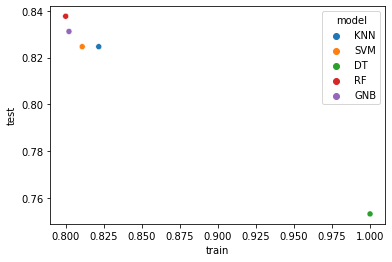

In [29]:
sns.scatterplot(data=model_comparison, x="train", y="test", hue="model")

### Acknowledgement
Reference: [Loan Prediction Using KNN, DT, SVM, LR, NB, RF](https://www.kaggle.com/code/tmleyncodes/loan-prediction-using-knn-dt-svm-lr-nb-rf/notebook)